<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/Muller's_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Files to be imported -->
1. merged.csv
2. twitter_stp.dic


# Import Data files

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv("merged.csv")
from sklearn.utils import shuffle
data = shuffle(data)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16350 entries, 15350 to 11582
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     16350 non-null  int64  
 1   agreement    16350 non-null  float64
 2   num_labels   16350 non-null  int64  
 3   label        16350 non-null  int64  
 4   tweet_id.1   16350 non-null  float64
 5   user_name    16350 non-null  object 
 6   user_id      16350 non-null  float64
 7   in_reply_to  16350 non-null  object 
 8   retweet      16350 non-null  int64  
 9   friends      16350 non-null  int64  
 10  followers    16350 non-null  int64  
 11  status       16350 non-null  int64  
 12  verified     16350 non-null  int64  
 13  tweet        16350 non-null  object 
 14  protected    16350 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 2.0+ MB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
15350,581265840236048384,0.666667,3,1,7.690000e+17,robfreedman,3587701.0,None,1,1137,1472,12932,0,Vaccinations are complete I'm all set for my ...,0
9936,563724278227419136,0.666667,3,1,4.790000e+17,TheDon2108,257654105.0,None,0,2281,3353,130188,0,I'm one the kids who got vaccinated back in th...,0
13338,573869338907795457,1.000000,3,1,5.600000e+17,mariannefavro,306420556.0,None,72,1915,73,1914,0,Santa Clara co. Public health dept confirms po...,0
15216,261502957458186241,0.666667,3,0,5.630000e+17,Cha_neen,538483342.0,None,0,229,502,15346,0,Vaccinate your damn kids,0
9356,567057742888984577,1.000000,3,1,3.940000e+17,Caunger11,548258205.0,None,0,510,863,23345,0,I just leaned my last page of drill today in m...,0


# Divide data into 3 sets

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
df = data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_valid_index in split.split(df, df.label):
    train_set = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.label):
    test_set = test_valid_set.iloc[test_index]
    valid_set = test_valid_set.iloc[valid_index]

print(train_set.shape)
print(test_set.shape)
valid_set.shape

(9810, 15)
(3270, 15)


(3270, 15)

In [9]:
train_set.label.value_counts()

 0    4873
 1    3946
-1     991
Name: label, dtype: int64

In [10]:
test_set.label.value_counts()

 0    1624
 1    1316
-1     330
Name: label, dtype: int64

In [11]:
valid_set.label.value_counts()

 0    1624
 1    1315
-1     331
Name: label, dtype: int64

# Dynamics of AntiVax, ProVax, Neutral

In [94]:
Neutral_data = data[data['label'] == 0]
Antivax_data = data[data['label'] == -1]
Provax_data = data[data['label'] == 1]

In [95]:
Neutral_data = shuffle(Neutral_data)
Neutral_data = Neutral_data[:1652]
Provax_data = shuffle(Provax_data)
Provax_data = Provax_data[:1652]

In [96]:
# Antivax_data = pd.read_csv("Train_Antivax.csv")
print(Antivax_data.info())
Antivax_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 2854 to 12510
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 206.5+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
2854,563178267797360640,0.666667,3,-1,5.130000e+17,juliasberle,3.395107e+07,ModelCarolAlt,0,1079,1001,6180,0,@ModelCarolAlt my son pre/post MMR. Vaccines a...,0
9185,363135958385823744,0.666667,3,-1,5.650000e+17,janesa_xo,1.199747e+09,None,0,1739,1211,93872,0,i don't believe in any medication beyond child...,0
16326,514613414296309760,0.666667,3,-1,1.720000e+17,OtakuJedi,2.837314e+07,None,0,471,1975,5807,0,Your stupidity is not contagious. Too bad ther...,0
13438,525024138172178432,1.000000,3,-1,5.230000e+17,InfectiousPS,2.827493e+08,None,2,950,420,3154,0,Scared of shots but it's worth it. Let's vacci...,0
10226,306618020845998081,1.000000,3,-1,5.750000e+16,ManyMenRecords,1.993288e+08,None,0,2693,3810,4322,0,It's a celebration everytime we link up #Sprin...,0


In [97]:
# Provax_data = pd.read_csv("Train_Provax.csv")
print(Provax_data.info())
Provax_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 14001 to 11253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 206.5+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
14001,561990988148011008,1.0,3,1,5.910000e+17,BLifeMontgomery,2.871400e+09,None,0,128,27,31149,0,Study of more than 95 000 kids finds no link b...,0
12509,76757487835029504,1.0,3,1,5.640000e+17,Chicago_CP,5.554066e+07,None,0,4695,33,451044,0,Parent Group Pushes Legislation Making It Hard...,0
14695,564557606425874434,1.0,3,1,5.240000e+17,TellaBadd,5.548164e+08,None,0,701,1580,14791,0,This bitch leaking Tatar sauce mayonnaise cott...,0
13023,562449973476745216,1.0,3,1,3.570000e+17,thecrago,1.510542e+07,BoingBoing,0,72,312,316,0,Refusal to vaccinate is voluntary manslaughter...,0
13031,562452786282258432,1.0,3,1,5.560000e+17,RobbiepMalachi,1.205552e+09,None,1,220,2509,14252,0,Remember those bigots worrying about immigrant...,0


In [98]:
# Neutral_data = pd.read_csv("Train_Neutral.csv")
print(Neutral_data.info())
Neutral_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 8821 to 15237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1652 non-null   int64  
 1   agreement    1652 non-null   float64
 2   num_labels   1652 non-null   int64  
 3   label        1652 non-null   int64  
 4   tweet_id.1   1652 non-null   float64
 5   user_name    1652 non-null   object 
 6   user_id      1652 non-null   float64
 7   in_reply_to  1652 non-null   object 
 8   retweet      1652 non-null   int64  
 9   friends      1652 non-null   int64  
 10  followers    1652 non-null   int64  
 11  status       1652 non-null   int64  
 12  verified     1652 non-null   int64  
 13  tweet        1652 non-null   object 
 14  protected    1652 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 206.5+ KB
None


,tweet_id,agreement,num_labels,label,tweet_id.1,user_name,user_id,in_reply_to,retweet,friends,followers,status,verified,tweet,protected
8821,357391492429520896,1.0,3,0,5.620000e+17,RickKagen,155433959.0,None,0,18,5,34,0,Hi @DrOz Measles outbreak in Michigan but Mich...,0
12915,561973164847009792,1.0,3,0,2.270000e+17,TheREALKenKoval,36606984.0,None,0,258,395,5424,0,Protecting my baby (and others) by getting a w...,0
7150,408439155392528386,1.0,3,0,5.610000e+17,dbkimbro,123022057.0,None,0,773,2182,13176,0,Considering myself lucky that my pediatrician ...,0
1296,320948136170373120,1.0,3,0,5.230000e+17,jrh2000,251265495.0,cnnbrk,0,29,117,2230,0,@cnnbrk how about using Ebola as a platform fo...,0
9404,547610640995868672,1.0,3,0,4.790000e+17,motherof4brats,64996681.0,None,0,32,0,793,0,I miss my generation.. Protests.. Playing in t...,0


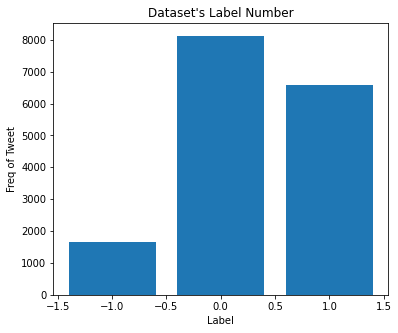

In [99]:
import matplotlib.pyplot as plt
df = data
fig = plt.figure(figsize=(6,5))
sentiment_count = df.groupby('label').count()
plt.bar(sentiment_count.index.values, sentiment_count['tweet'])
plt.xlabel('Label')
plt.ylabel('Freq of Tweet')
plt.title('Dataset\'s Label Number')
plt.show()

In [100]:
df.label.value_counts()

 0    8121
 1    6577
-1    1652
Name: label, dtype: int64

# length of tweets in each class

In [101]:
# determining length of each tweet of each class --> plot some histogram
# length of all tweets
df = Antivax_data
a=[]
for i in range(len(df)):
  a.append(len(Antivax_data['tweet'].iloc[i].split()))
print(max(a))
df = Provax_data
b=[]
for i in range(len(df)):
  b.append(len(df['tweet'].iloc[i].split()))
print(max(b))
df = Neutral_data
c=[]
for i in range(len(df)):
  c.append(len(df['tweet'].iloc[i].split()))
print(max(c))

116
791
43


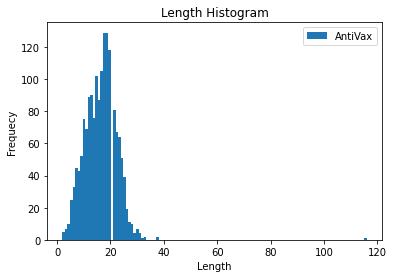

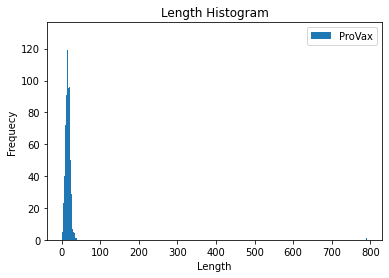

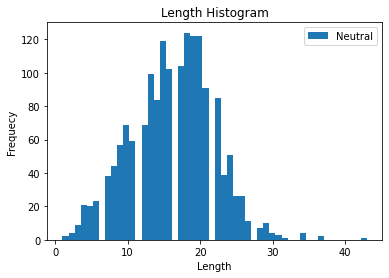

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
plt.hist(a,bins= 120, label = "AntiVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(b,bins= 800, label = "ProVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(c, bins= 50, label = "Neutral")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()

Text(0.5, 1.0, 'Length Histogram')

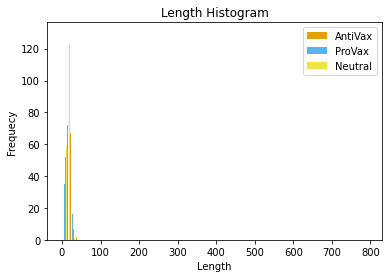

In [105]:
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ["AntiVax","ProVax","Neutral"]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([a,b,c], bins = int(800),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')

# More Tweet Data

### **Verified Accounts moslty post Neutral or ProVax Tweets and Very less AntiVax Tweets**

In [140]:
frames = [Neutral_data, Provax_data, Antivax_data]
result = pd.concat(frames)
Tweet_df_available = result

In [126]:
# Neutral, AntiVax, ProVax, count =0,0, 0,0
# for i in range(len(Tweet_df_available)):
#   if Tweet_df_available['verified'].iloc[i] == True:
#     if Tweet_df_available['label'].iloc[i] == "Neutral":
#       Neutral = Neutral + 1
#     elif Tweet_df_available['label'].iloc[i] == "AntiVax":
#       AntiVax = AntiVax + 1
#     elif Tweet_df_available['label'].iloc[i] == "ProVax":
#       ProVax = ProVax + 1
#   count = count + 1
# print(Neutral, AntiVax, ProVax, count)

In [143]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
# Tweet_df_available = df
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['verified'].iloc[i] == 1:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

50 43 49 142


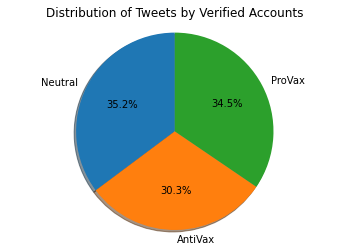

In [144]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [50, 43, 49]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets by Verified Accounts")
plt.show()

### People with more than 10000 followers, tends to tweet more Neutral and ProVax Tweets 

In [129]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['followers'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

36 24 26 86


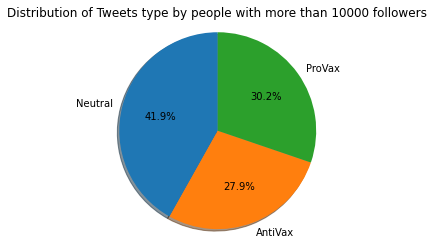

In [137]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [36, 24, 26]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 followers")
plt.show()

### **People with more than 1000 friends, tends to post mre neutral and ProVax tweets**

In [131]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['friends'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

77 63 62 202


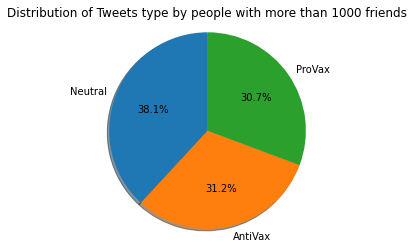

In [135]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [77,63,62]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 1000 friends")
plt.show()

### **People who usually posts more than 10000 statuses on their walls, tends to speak about ProVax or Neutral in their Tweets**

In [133]:
# statuses_count
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['status'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

1046 997 993 3036


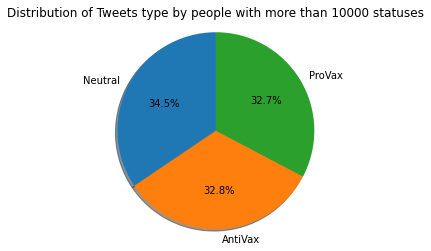

In [136]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [1046, 997, 993]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 statuses")
plt.show()

# NER Tagging in the tweets

In [145]:
df = Neutral_data
a=[]
for i in range(len(df)):
  a.append(df['tweet'].iloc[i].split())
print(a)

[['Hi', '@DrOz', 'Measles', 'outbreak', 'in', 'Michigan', 'but', 'Michigan', 'Court', 'has', 'threatened', 'me', 'with', 'jail', 'time', 'if', 'I', 'vaccinate', 'daughters.', 'Insane!'], ['Protecting', 'my', 'baby', '(and', 'others)', 'by', 'getting', 'a', 'whooping', 'cough', 'vaccine', 'before', 'work.', '(@', 'Clay', 'County', 'Health', 'Department)', 'http://t.co/oEuspcEo'], ['Considering', 'myself', 'lucky', 'that', 'my', 'pediatrician', 'failed', 'to', 'record', 'my', 'MMR', 'booster', 'back-when', 'so', 'I', 'had', 'to', 're-immunize', '5', 'yrs', 'ago', 'at', "ASU's", 'req.'], ['@cnnbrk', 'how', 'about', 'using', 'Ebola', 'as', 'a', 'platform', 'for', '#Vaccines', 'that', 'parents', 'refuse', 'to', 'give', 'kids', 'against', 'deadly', 'diseases', 'that', "we've", 'already', 'wiped?', 'with', '73%', 'related', 'to', 'Disney', 'CDC', 'says', 'http://t.co/Q02B2ZL10G"'], ['I', 'miss', 'my', 'generation..', 'Protests..', 'Playing', 'in', 'the', 'front', 'yard..', 'School', 'vaccine'

In [146]:
import pickle
with open('neutral_list.pkl', 'wb') as f:
  pickle.dump(a, f)

In [ ]:
# with open('neutral_list.pkl', 'rb') as f:
#   neutral_list = pickle.load(f)
# with open('antivax_list.pkl', 'rb') as f:
#   antivax_list = pickle.load(f)
# with open('provax_list.pkl', 'rb') as f:
#   provax_list = pickle.load(f)

In [148]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(neutral_list[0])
sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Hi', 'NNP'),
 ('@DrOz', 'NNP'),
 ('Measles', 'NNP'),
 ('outbreak', 'NN'),
 ('in', 'IN'),
 ('Michigan', 'NNP'),
 ('but', 'CC'),
 ('Michigan', 'NNP'),
 ('Court', 'NNP'),
 ('has', 'VBZ'),
 ('threatened', 'VBN'),
 ('me', 'PRP'),
 ('with', 'IN'),
 ('jail', 'NN'),
 ('time', 'NN'),
 ('if', 'IN'),
 ('I', 'PRP'),
 ('vaccinate', 'VBP'),
 ('daughters.', 'NNS'),
 ('Insane!', 'NNP')]

# Word Frequency of AntiVax Tweets

In [149]:
df = Antivax_data

In [150]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

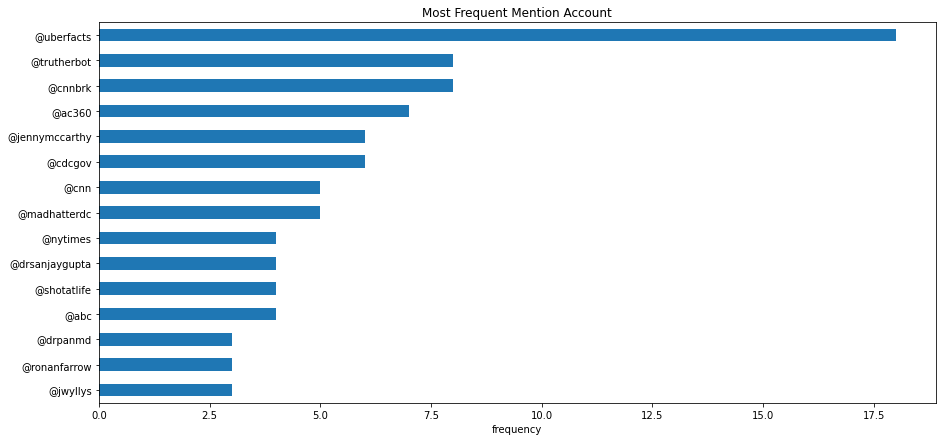

In [151]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [152]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

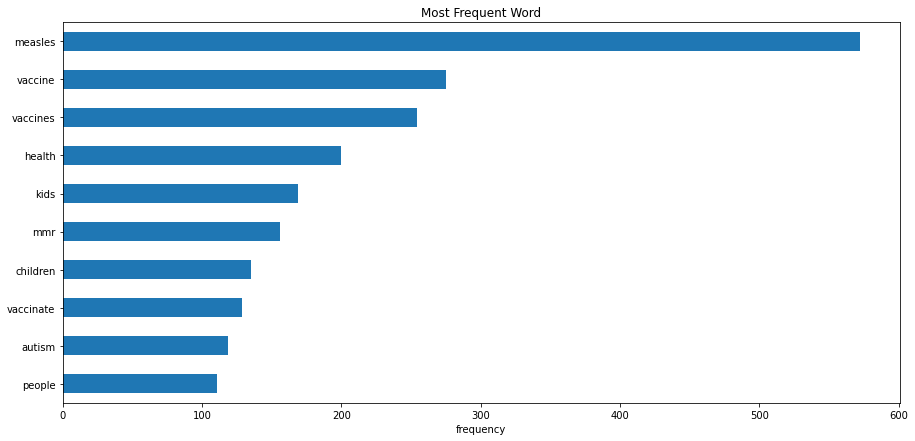

In [153]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of ProVax Tweets

In [154]:
df = Provax_data

In [155]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

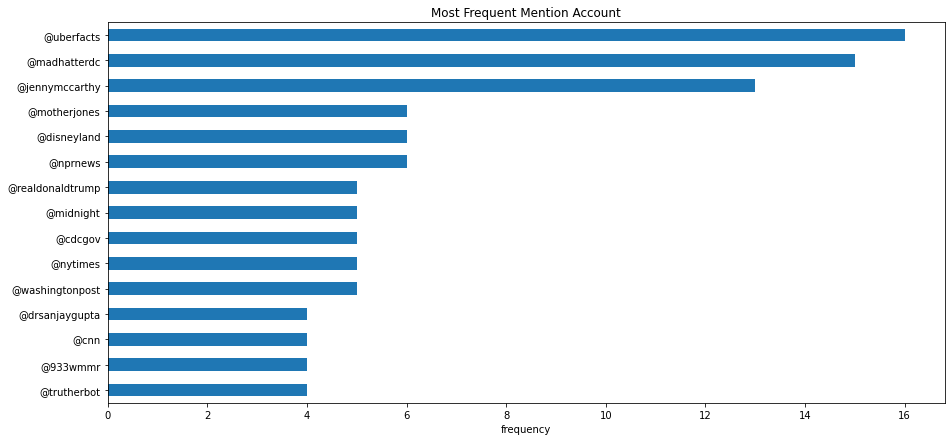

In [156]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [157]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

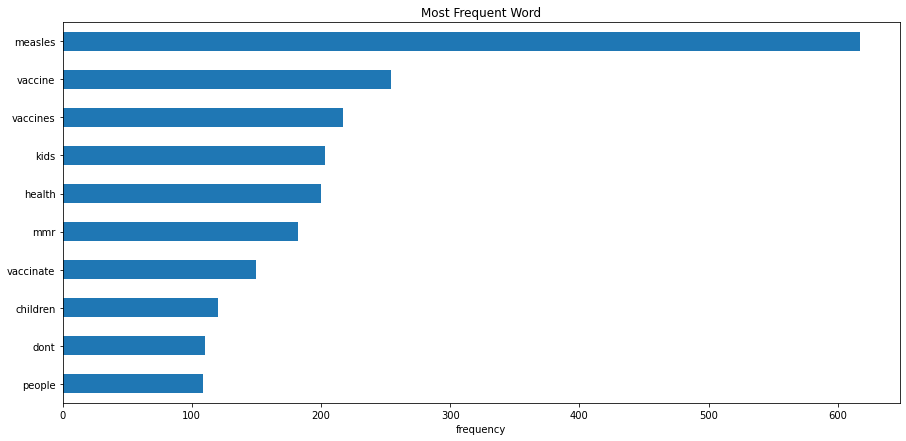

In [158]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of Neutral Tweets

In [159]:
df = Neutral_data

In [160]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

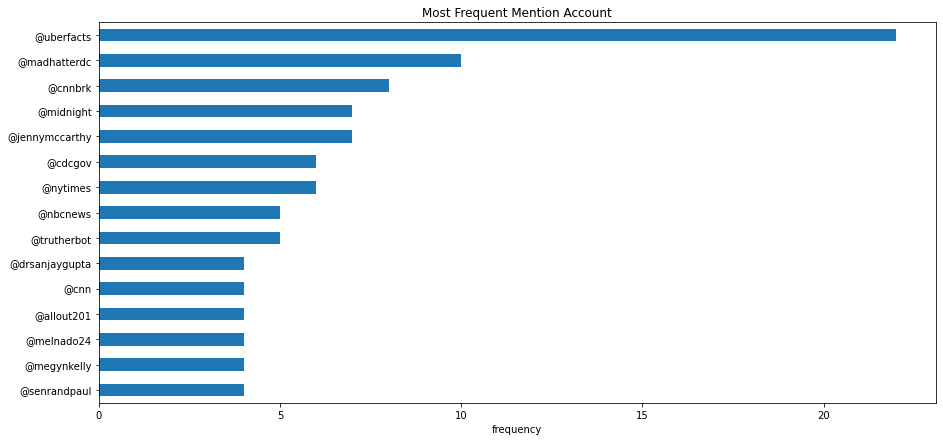

In [161]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [162]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

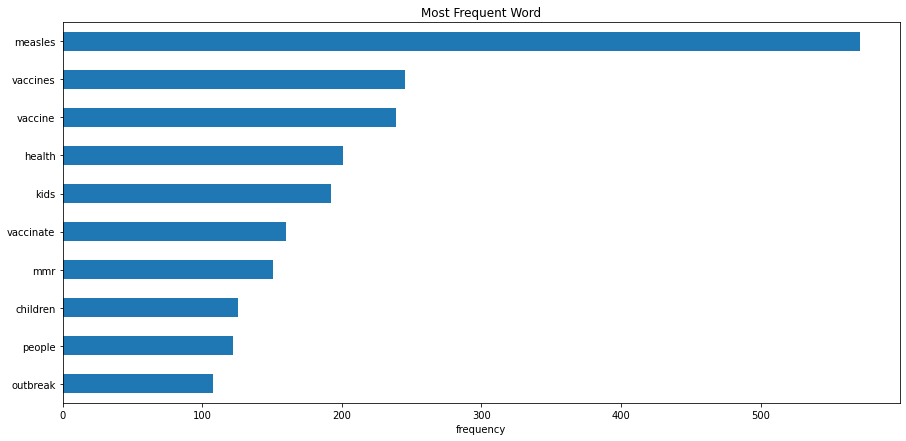

In [163]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# NER Tagging ProVax

In [164]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
Provax_NER = []
for i in range(len(neutral_list)):
  sent = preprocess(neutral_list[i])
  Provax_NER.append(sent)
Provax_NER[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Hi', 'NNP'),
 ('@DrOz', 'NNP'),
 ('Measles', 'NNP'),
 ('outbreak', 'NN'),
 ('in', 'IN'),
 ('Michigan', 'NNP'),
 ('but', 'CC'),
 ('Michigan', 'NNP'),
 ('Court', 'NNP'),
 ('has', 'VBZ'),
 ('threatened', 'VBN'),
 ('me', 'PRP'),
 ('with', 'IN'),
 ('jail', 'NN'),
 ('time', 'NN'),
 ('if', 'IN'),
 ('I', 'PRP'),
 ('vaccinate', 'VBP'),
 ('daughters.', 'NNS'),
 ('Insane!', 'NNP')]

In [ ]:
Provax_NER

In [165]:
df = pd.DataFrame(Provax_NER)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,"(Hi, NNP)","(@DrOz, NNP)","(Measles, NNP)","(outbreak, NN)","(in, IN)","(Michigan, NNP)","(but, CC)","(Michigan, NNP)","(Court, NNP)","(has, VBZ)","(threatened, VBN)","(me, PRP)","(with, IN)","(jail, NN)","(time, NN)","(if, IN)","(I, PRP)","(vaccinate, VBP)","(daughters., NNS)","(Insane!, NNP)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"(Protecting, VBG)","(my, PRP$)","(baby, NN)","((and, NNP)","(others), NN)","(by, IN)","(getting, VBG)","(a, DT)","(whooping, JJ)","(cough, NN)","(vaccine, NN)","(before, IN)","(work., JJ)","((@, NNP)","(Clay, NNP)","(County, NNP)","(Health, NNP)","(Department), NNP)","(http://t.co/oEuspcEo, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"(Considering, VBG)","(myself, PRP)","(lucky, JJ)","(that, IN)","(my, PRP$)","(pediatrician, NN)","(failed, VBD)","(to, TO)","(record, VB)","(my, PRP$)","(MMR, NNP)","(booster, NN)","(back-when, NN)","(so, IN)","(I, PRP)","(had, VBD)","(to, TO)","(re-immunize, VB)","(5, CD)","(yrs, NN)","(ago, RB)","(at, IN)","(ASU's, NNP)","(req., NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(@cnnbrk, VB)","(how, WRB)","(about, IN)","(using, VBG)","(Ebola, NNP)","(as, IN)","(a, DT)","(platform, NN)","(for, IN)","(#Vaccines, NNS)","(that, WDT)","(parents, NNS)","(refuse, VBP)","(to, TO)","(give, VB)","(kids, NNS)","(against, IN)","(deadly, JJ)","(diseases, NNS)","(that, WDT)","(we've, VBP)","(already, RB)","(wiped?, VBN)","(with, IN)","(73%, CD)","(related, JJ)","(to, TO)","(Disney, NNP)","(CDC, NNP)","(says, VBZ)","(http://t.co/Q02B2ZL10G"", NN)",None,None,None,None,None,None,None,None,None,None,None,None
4,"(I, PRP)","(miss, VBP)","(my, PRP$)","(generation.., NN)","(Protests.., NNP)","(Playing, NNP)","(in, IN)","(the, DT)","(front, NN)","(yard.., JJ)","(School, NNP)","(vaccine, NN)","(day..., NN)","(Bring, NNP)","(those, DT)","(days, NNS)","(back, RB)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
